# 3D Modeling 시장 규모 조사

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [39]:
real_estate_trade = pd.read_csv('E:/Git/data/3D_modeling_market_size_research/서울시 부동산 실거래가 정보.csv', encoding = 'cp949')

In [40]:
real_estate_trade.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2022,11710,송파구,10800,문정동,1.0,대지,639.0,5.0,힐스테이트에코송파,...,19000,21.06,31.38,10.0,NaN,NaN,2017.0,오피스텔,중개거래,서울 송파구
1,2022,11560,영등포구,12600,양평동2가,1.0,대지,43.0,14.0,CO-OP Residence/오목교,...,12500,26.38,41.30,10.0,NaN,NaN,2004.0,오피스텔,중개거래,서울 영등포구
2,2022,11500,강서구,10300,화곡동,1.0,대지,366.0,39.0,더그린,...,19700,36.39,22.43,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
3,2022,11500,강서구,10500,마곡동,1.0,대지,758.0,3.0,마곡헤리움2차,...,16500,22.51,33.97,3.0,NaN,NaN,2016.0,오피스텔,중개거래,서울 강서구
4,2022,11740,강동구,10900,천호동,NaN,NaN,NaN,NaN,NaN,...,96000,164.40,171.00,NaN,NaN,NaN,1978.0,단독다가구,중개거래,서울 강동구


In [41]:
real_estate_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640000 entries, 0 to 639999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              640000 non-null  int64  
 1   자치구코드             640000 non-null  int64  
 2   자치구명              640000 non-null  object 
 3   법정동코드             640000 non-null  int64  
 4   법정동명              640000 non-null  object 
 5   지번구분              591190 non-null  float64
 6   지번구분명             591190 non-null  object 
 7   본번                591200 non-null  object 
 8   부번                591200 non-null  float64
 9   건물명               591181 non-null  object 
 10  계약일               640000 non-null  int64  
 11  물건금액(만원)          640000 non-null  int64  
 12  건물면적(㎡)           640000 non-null  float64
 13  토지면적(㎡)           481273 non-null  float64
 14  층                 591227 non-null  float64
 15  권리구분              5786 non-null    object 
 16  취소일               15

In [42]:
real_estate_trade.describe()

,접수연도,자치구코드,법정동코드,지번구분,부번,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
count,640000.000000,640000.000000,640000.000000,591190.000000,591200.000000,6.400000e+05,6.400000e+05,640000.000000,481273.000000,591227.000000,1.597500e+04,637452.000000
mean,2019.693152,11449.430805,10934.587031,1.002578,31.127527,2.019714e+07,6.025837e+04,70.903506,35.594373,6.631839,2.020782e+07,1983.723094
std,1.224371,171.839847,1245.512641,0.067731,128.376086,1.217231e+04,6.859770e+04,67.563829,182.903578,5.775905,7.098636e+03,190.280827
min,2017.000000,11110.000000,10100.000000,1.000000,0.000000,2.018012e+07,1.700000e+03,5.070000,0.000000,-3.000000,2.020022e+07,0.000000
25%,2019.000000,11305.000000,10200.000000,1.000000,0.000000,2.019030e+07,2.390000e+04,39.050000,0.000000,3.000000,2.020082e+07,1993.000000
50%,2020.000000,11470.000000,10500.000000,1.000000,2.000000,2.020030e+07,3.995000e+04,59.400000,25.110000,5.000000,2.021022e+07,2002.000000
75%,2021.000000,11590.000000,10900.000000,1.000000,18.000000,2.021013e+07,7.450000e+04,84.780000,37.500000,10.000000,2.021100e+07,2012.000000
max,2022.000000,11740.000000,18700.000000,3.000000,4813.000000,2.022073e+07,1.108778e+07,3619.840000,119119.000000,73.000000,2.022073e+07,2022.000000


In [43]:
real_estate_trade_edit1 = real_estate_trade[['접수연도', '자치구명', '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '층', '건축년도']]

In [44]:
real_estate_trade_edit1.sample(5)

,접수연도,자치구명,건물명,계약일,물건금액(만원),건물면적(㎡),층,건축년도
226145,2020,도봉구,방학동삼성래미안2,20200831,75000,84.94,15.0,2002.0
636722,2018,도봉구,상아1차아파트,20180120,34000,58.59,9.0,1987.0
148930,2021,관악구,벽산블루밍3차,20210227,100100,111.04,20.0,2004.0
34122,2022,관악구,다숲,20220207,45000,53.84,5.0,2016.0
38052,2022,구로구,비즈트위트 레인보우,20220114,12500,19.61,12.0,2012.0


In [45]:
real_estate_trade_edit1[['접수연도', '물건금액(만원)']].groupby('접수연도').sum()

,물건금액(만원)
접수연도,
2017,319596
2018,7698180239
2019,8106673496
2020,11523937991
2021,8758304694
2022,2477939654


In [46]:
real_estate_trade_edit1['접수연도'].value_counts()

2020    183857
2018    144783
2021    137706
2019    130602
2022     43047
2017         5
Name: 접수연도, dtype: int64

In [65]:
# 2017년도 데이터는 극소수이므로 제외
# 2022년도 데이터는 상반기 데이터만 있는것으로 보이므로 전체값에서 제외
real_estate_trade_edit2 = real_estate_trade_edit1[(real_estate_trade_edit1['접수연도'] != 2017) & (real_estate_trade_edit1['접수연도'] != 2022)]
real_estate_trade_edit2['접수연도'] = real_estate_trade_edit2['접수연도'].astype(str)
real_estate_trade_edit2['계약일'] = real_estate_trade_edit2['계약일'].astype(str)
real_estate_trade_edit2.tail()

,접수연도,자치구명,건물명,계약일,물건금액(만원),건물면적(㎡),층,건축년도
639995,2018,용산구,NaN,20180116,102000,54.35,NaN,1958.0
639996,2018,성동구,(1198-0),20180116,28000,36.63,1.0,1994.0
639997,2018,광진구,NaN,20180116,52000,93.42,NaN,1992.0
639998,2018,성북구,꿈의숲대명루첸아파트,20180116,49500,84.84,5.0,2008.0
639999,2018,동대문구,NaN,20180116,25000,91.89,NaN,1993.0


In [66]:
real_estate_trade_edit2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596948 entries, 29868 to 639999
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   접수연도      596948 non-null  object 
 1   자치구명      596948 non-null  object 
 2   건물명       551400 non-null  object 
 3   계약일       596948 non-null  object 
 4   물건금액(만원)  596948 non-null  int64  
 5   건물면적(㎡)   596948 non-null  float64
 6   층         551412 non-null  float64
 7   건축년도      594672 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 41.0+ MB


In [67]:
real_estate_trade_edit2['접수연도'].value_counts()

2020    183857
2018    144783
2021    137706
2019    130602
Name: 접수연도, dtype: int64

In [68]:
real_estate_trade_edit2.groupby('접수연도').mean()

,물건금액(만원),건물면적(㎡),층,건축년도
접수연도,,,,
2018,53170.470559,76.392162,6.855333,1968.249001
2019,62071.587694,73.094315,7.138424,1969.944703
2020,62678.810113,71.517990,6.691572,1989.480573
2021,63601.474838,65.802134,6.113113,1999.292516


In [57]:
real_estate_trade_sum = real_estate_trade_edit2[['접수연도', '물건금액(만원)']].groupby('접수연도').sum()
real_estate_trade_sum

,물건금액(만원)
접수연도,
2018,7698180239
2019,8106673496
2020,11523937991
2021,8758304694


In [50]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style = 'darkgrid')
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family'] = 'Malgun Gothic'


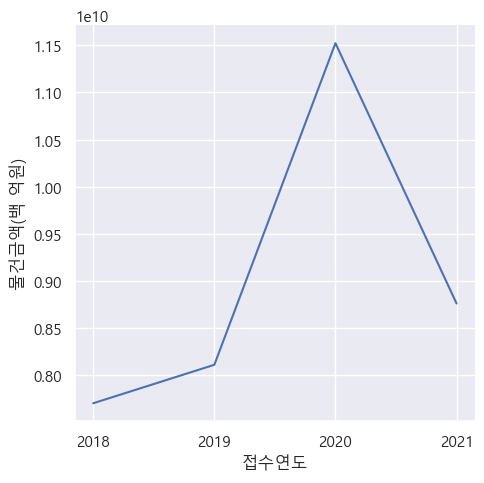

In [61]:
sns.relplot(x = '접수연도', y = '물건금액(만원)', data = real_estate_trade_sum, kind = 'line').set(ylabel = '물건금액(백 억원)')
